In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re

from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
  

In [2]:
#reading the dataset
zomato_real=pd.read_csv("./zomato.csv")
zomato_real.head() # prints the first N rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [5]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [6]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [7]:
#Reading Column Names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [9]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [10]:
#Reading Rate of dataset
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [13]:
zomato['city'].unique()
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
## Checking Null values
zomato.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [15]:
## Checking unvaild name values
unvalid_index = []

for i in range(len(zomato)):
    if len(zomato['name'][i]) > 60: #After numerous attemps, we found out 60 is the number to optimal number to clean dirty values
        unvalid_index.append(i)

print("Previous restaurant count : ", len(zomato))
print("Unvalid name count : ", len(unvalid_index))
print(zomato['name'][unvalid_index[:10]])
zomato = zomato.drop(index=unvalid_index[:])
print("Processed restaurant count",len(zomato))

Previous restaurant count :  41237
Unvalid name count :  120
4049     Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
4447     Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
4984     Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
9259     Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
9503     Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
10172    Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
11530    Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
11934    Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
12325    Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
14395    Urban Solace - CafãÂÃÂÃÂÃÂÃÂÃÂÃÂ...
Name: name, dtype: object
Processed restaurant count 41117


In [16]:
## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()

In [17]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.118182
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.100000
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.800000
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.700000
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.800000


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

zomato.sample(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
18497,"296, 24th Main, 6th Phase, JP Nagar, Bangalore",Subway,True,False,4.0,273,JP Nagar,Quick Bites,"Salad, Fast Food",600.0,"[('Rated 1.0', 'RATED\n Visited this subway o...",[],Dine-out,JP Nagar,3.16
19121,"254, 3rd Main Road, 1st Stage, 5th Block, HBR ...",Coffee Mechanics,True,False,4.3,191,HBR Layout,Cafe,"Cafe, Bakery, French, Jewish, Sandwich, Vegan,...",700.0,"[('Rated 5.0', ""RATED\n I've always been a fi...",[],Delivery,Kalyan Nagar,4.23
29565,"4, Maruthi Nagar Main Rd, Zuzuvadi, Madiwala, ...",Kannoor Restaurant,True,False,3.1,18,BTM,Casual Dining,"Kerala, Chinese, South Indian, North Indian",700.0,"[('Rated 2.0', ""RATED\n A Kerala style restau...","['Sambhavam Dosa', 'Masala Dosa', 'Butter Chic...",Dine-out,Koramangala 7th Block,2.68


In [19]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3.99
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3.97
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.58
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.45
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.58


<h1>Text Preprocessing</h1>

Some of the common text preprocessing / cleaning steps are:

Lower casing
Removal of Punctuations
Removal of Stopwords
Removal of URLs
Spelling correction


In [20]:
# 5 examples of these columns before text processing:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
27779,"[('Rated 4.0', 'RATED\n Good Food with a hygi...",South Indian
30448,"[('Rated 4.0', 'RATED\n Hotel Green Tara, Bri...","Chinese, Tibetan, Momos"
3638,"[('Rated 4.0', 'RATED\n Tipsy Bull was a grea...","North Indian, Chinese, Continental, Mexican"
30451,"[('Rated 4.5', 'RATED\n Amazing food.\nTruly ...","Andhra, North Indian, Chinese"
27606,"[('Rated 3.0', ""RATED\n This cafe isn't visib...",Cafe


In [21]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
6370,"[('rated 4.0', 'rated\n really nice place to ...",Cafe
17618,"[('rated 1.0', 'rated\n ordered rajbhog kulfi...",Desserts
32355,"[('rated 4.0', 'rated\n being a bong, having ...","Mithai, Street Food"
11754,"[('rated 3.0', 'rated\n i have mixed feeling ...","Beverages, Ice Cream"
40620,"[('rated 1.0', 'rated\n the worst experience ...","North Indian, Chinese"


In [22]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
31042,rated 30 ratedn an okay food for a cheap pric...,Biryani
21035,rated 40 ratedn completely north indian loved...,"Street Food, North Indian"
9314,rated 50 ratedn i have ordered a few times fr...,"Cafe, Fast Food, Desserts, Beverages"
33248,rated 40 ratedn visited this place to eat aut...,Oriya
20889,rated 40 ratedn weãx83ãx83ãx82ãx82ãx83ã...,"Chettinad, Andhra, Kerala"


In [23]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

In [24]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [25]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
18517,,"Fast Food, Desserts"
18730,rated 40 ratedn typical south corner crave sou...,South Indian
33120,rated 30 ratedn went dinner friends holiday pl...,"North Indian, Chinese"
3632,rated 30 ratedn place locals like polished din...,"North Indian, South Indian, Continental"
33468,rated 30 ratedn worth money best part kerala p...,Kerala


In [26]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
restaurant_names[:5] #.head()

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village']

<h1>Visualization</h1>

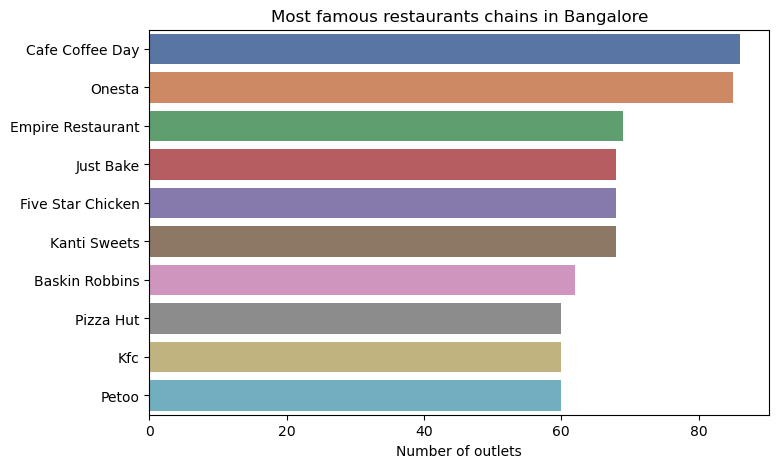

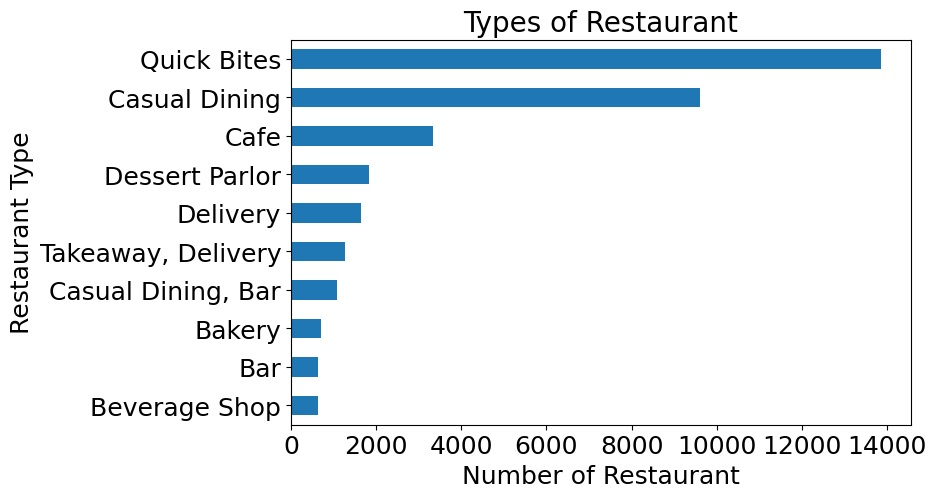

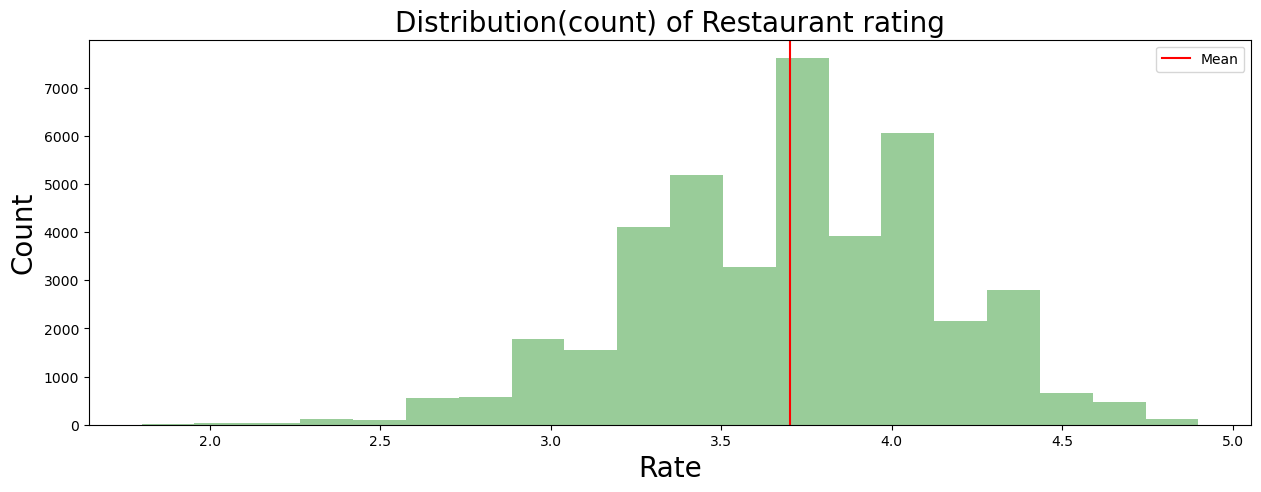

In [27]:
#Most Famous restaurant chains in Banglore
plt.figure(figsize=(8,5))
chains=zomato['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")
plt.show()

#Types of Restaurant
counts = zomato["rest_type"].value_counts()[:10] 
p = counts.sort_values().plot.barh(figsize=(8,5), fontsize=18) 
p.set_xlabel("Number of Restaurant",fontsize=18) 
p.set_ylabel("Restaurant Type",fontsize=18)
p.set_title("Types of Restaurant", fontsize=20)

#Distribution of Restaurant Rating 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(zomato.rate,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(zomato.rate.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

In [28]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

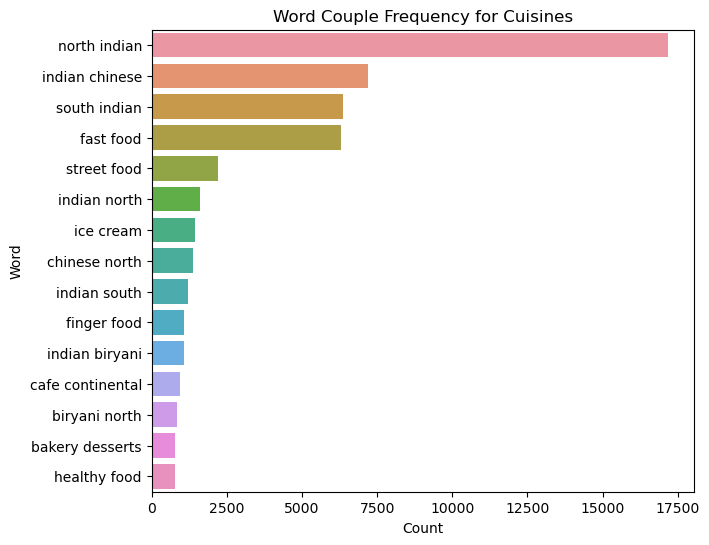

In [29]:
# Top 15 two word frequencies for Cuisines
lst = get_top_words(zomato['cuisines'], 15, (2,2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(7,6))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');

In [30]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,3.99
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,3.97
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.58
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.45
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.58


In [31]:
zomato.sample(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
5221,"23/24, Lakshmi Complex, Kamaraj Road, Near Com...",Cool Joint,False,False,3.6,25,Commercial Street,Quick Bites,"Beverages, Desserts",250.0,rated 40 ratedn located prime place lots choic...,[],Dine-out,Brigade Road,3.52
40601,"154, Whitefield Main Road, Whitefield, Bangalore",Herbs & Spices,True,True,4.0,1116,Whitefield,Casual Dining,"Italian, North Indian",1.0,rated 50 ratedn wow think thatãx83ãx83ãx82ã...,[],Delivery,Whitefield,3.84
19760,"10, 9th Main Road, Chairman's Layout, Banaswad...",Pooja Dosa Camp,False,False,4.0,130,Banaswadi,Quick Bites,South Indian,200.0,rated 50 ratedn iãx83ãx83ãx82ãx82ãx83ãx8...,[],Dine-out,Kalyan Nagar,3.84
9692,"4, St Mary's Building, 39/1, 2nd Stage, Indira...",Foreign CafãÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,True,False,3.1,54,Indiranagar,Delivery,Continental,500.0,rated 10 ratedn one worst ever restos ordered ...,"['Veg Arrabbiata Pasta', 'Veg Parma Rosa Pasta...",Delivery,Church Street,3.25
17632,"81, 36th Cross Road, 5th Block, Jayanagar, Ban...",Karma Kaapi,True,False,4.4,181,Jayanagar,Beverage Shop,"Beverages, Tea",250.0,rated 40 ratedn place personally become favour...,[],Delivery,JP Nagar,4.37


In [32]:
zomato.shape

(41117, 15)

In [33]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [34]:
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [35]:
# Random sampling from df (for testing)
df_percent = zomato.sample(frac=0.1)
df_percent.shape

(4112, 10)

Term Frequency-Inverse Document Frequency

Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a restaurant, as before.

TF-IDF is the statistical method of evaluating the significance of a word in a given document.

TF — Term frequency(tf) refers to how many times a given term appears in a document.

IDF — Inverse document frequency(idf) measures the weight of the word in the document, i.e if the word is common or rare in the entire document. The TF-IDF intuition follows that the terms that appear frequently in a document are less important than terms that rarely appear. Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix quite easily.

In [36]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

from auto_contest_based_cf import recommend_by_name, recommend_by_description



In [37]:
recommend_by_name(df_percent, 'Asia Kitchen By Mainland China', 'reviews_list', 10, columns=['cuisines', 'Mean Rating', 'cost'], rating="Mean Rating")

,cuisines,Mean Rating,cost
Asia Kitchen By Mainland China,"Asian, Chinese, Thai, Momos",5.00,1.5
Flechazo,"Asian, Mediterranean, North Indian, BBQ",4.87,1.4
1131 Bar + Kitchen,"Continental, Asian, Italian, North Indian",4.48,1.5
Big Wong Xl,"Chinese, Sushi, Asian, Thai",4.48,1.4
Gilly'S Restobar,"Finger Food, Continental, North Indian",4.44,1.0
Myu Bar At Gilly'S Redefined,"American, North Indian, Pizza, Finger Food, Co...",4.41,1.2
Bombay Adda,Modern Indian,4.38,1.1
Mamagoto,"Asian, Thai, Chinese, BBQ, Momos",4.35,1.6
Nasi And Mee,"Malaysian, Thai, Singaporean, Asian, Chinese, ...",4.35,1.0
Shizusan Shophouse & Bar,"Asian, Japanese, Vietnamese, Korean, Chinese, ...",4.35,1.8


In [38]:
recommend_by_description(df_percent, 'place good for dating', 10, target_columns=['reviews_list', 'cuisines'], columns=['cuisines', 'Mean Rating', 'cost'])

,cuisines,Mean Rating,cost
3970,"Mediterranean, European, Salad",4.51,1.8
9998,"Mediterranean, European, Salad",4.51,1.8
24203,"North Indian, Continental, Chinese",3.52,2.0
36405,"North Indian, South Indian, Chinese, Biryani",3.39,400.0
29771,"North Indian, Continental, Chinese",3.52,2.0
...,...,...,...
37572,Cafe,3.19,1.0
18525,"Biryani, South Indian",2.85,300.0
9018,Fast Food,2.94,300.0
10924,"North Indian, Chinese",3.34,400.0
